In [ ]:
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy

In [ ]:
xl1 = pd.ExcelFile('1.xlsx')
xl2 = pd.ExcelFile('2.xlsx') #!!!!!! измените имя файла и название рабочего листа
xl1 #эта команда выведет пять случайных строк таблицы, таблица не отобразиться полностью.
xl2

In [ ]:
xl1.sheet_names

['Arkusz1']

In [ ]:
xl2.sheet_names

['Arkusz1', 'Arkusz2']

In [ ]:
df = xl1.parse('Arkusz1') #wkinut tot sheet w dataframe
df.columns

Index(['połoczenia inhibitor betalaktamazy/ penicylina',
       'cefalosporyny 3 generacji', 'karbapenemy', 'aminoglikozydy',
       'fluorochinolony', 'sulfonamidy', 'tetracykliny', 'biofilm RT',
       'biofilm 37C', 'swimming RT', 'swimming 37C', 'swarming RT',
       'swarming 37C'],
      dtype='object')

In [ ]:
df1 = xl2.parse('Arkusz2') #wkinut tot sheet w dataframe
df1.columns

Index(['biofilm RT', 'biofilm 37C', 'swimming RT', 'swimming 37C',
       'swarming RT', 'swarming 37C', 'AMC', 'TZP', 'CXM', 'CTX', 'CAZ', 'FEP',
       'IPM', 'MEM', 'ETP', 'AMK', 'CN', 'CIP', 'SXT', 'TGC', 'FOX'],
      dtype='object')

In [ ]:
# !!!!!! укажите количественные (int, float) столбцы, по которым выполним кластеризацию
col1=['połoczenia inhibitor betalaktamazy/ penicylina', 'cefalosporyny 3 generacji','karbapenemy','aminoglikozydy','fluorochinolony', 'sulfonamidy', 'tetracykliny', 'biofilm RT','biofilm 37C', 'swimming RT', 'swimming 37C', 'swarming RT',
       'swarming 37C']
col2=[ 'biofilm RT', 'biofilm 37C', 'swimming RT',
       'swimming 37C', 'swarming RT', 'swarming 37C', 'AMC', 'TZP',
       'CXM', 'CTX', 'CAZ', 'FEP', 'IPM', 'MEM', 'ETP', 'AMK', 'CN', 'CIP',
       'SXT', 'TGC', 'FOX']

In [ ]:
pd.options.mode.chained_assignment = None 
df[col1].fillna(0, inplace=True) # заменим пропуски данных нулями, в противном случае выдаст ошибку
pd.options.mode.chained_assignment = None 
df1[col2].fillna(0, inplace=True) # заменим пропуски данных нулями, в противном случае выдаст ошибку

In [ ]:
df[col1].corr() # посмотрим на парные корреляции

,połoczenia inhibitor betalaktamazy/ penicylina,cefalosporyny 3 generacji,karbapenemy,aminoglikozydy,fluorochinolony,sulfonamidy,tetracykliny,biofilm RT,biofilm 37C,swimming RT,swimming 37C,swarming RT,swarming 37C
połoczenia inhibitor betalaktamazy/ penicylina,1.000000,0.265227,0.247594,0.074887,0.047946,0.079293,-0.078008,0.175850,0.318151,0.090670,0.042810,0.351003,0.329886
cefalosporyny 3 generacji,0.265227,1.000000,0.046829,0.329634,0.453423,0.408678,-0.186886,-0.020300,0.226121,-0.288182,0.257358,-0.143021,-0.229528
karbapenemy,0.247594,0.046829,1.000000,0.109985,-0.077460,-0.053376,-0.070014,0.034785,0.281003,0.053855,-0.115821,-0.037856,0.024576
aminoglikozydy,0.074887,0.329634,0.109985,1.000000,0.567962,0.610541,-0.061604,-0.027019,0.413055,-0.329036,0.161634,-0.033309,-0.073590
fluorochinolony,0.047946,0.453423,-0.077460,0.567962,1.000000,0.785553,-0.108465,-0.214500,0.225307,-0.307863,0.173684,-0.062671,-0.142942
sulfonamidy,0.079293,0.408678,-0.053376,0.610541,0.785553,1.000000,-0.100901,-0.120898,0.252569,-0.309097,0.289043,0.344811,0.257864
tetracykliny,-0.078008,-0.186886,-0.070014,-0.061604,-0.108465,-0.100901,1.000000,-0.002838,0.091679,0.188447,-0.146112,-0.054101,-0.033192
biofilm RT,0.175850,-0.020300,0.034785,-0.027019,-0.214500,-0.120898,-0.002838,1.000000,0.489589,0.056328,0.054741,0.151666,0.266959
biofilm 37C,0.318151,0.226121,0.281003,0.413055,0.225307,0.252569,0.091679,0.489589,1.000000,-0.298067,-0.088903,-0.041561,0.017813
swimming RT,0.090670,-0.288182,0.053855,-0.329036,-0.307863,-0.309097,0.188447,0.056328,-0.298067,1.000000,0.266943,0.236148,0.266885


df[col1].corr() # посмотрим на парные корреляции

In [ ]:
df1[col2].corr() # посмотрим на парные корреляции

,biofilm RT,biofilm 37C,swimming RT,swimming 37C,swarming RT,swarming 37C,AMC,TZP,CXM,CTX,CAZ,FEP,IPM,MEM,ETP,AMK,CN,CIP,SXT,TGC,FOX
biofilm RT,1.000000,0.489589,0.056328,0.054741,0.151666,0.266959,-0.319003,-0.256588,0.109302,0.193522,-0.271069,0.047581,0.043902,-0.006438,-0.003698,0.098857,0.325695,0.249444,0.077940,0.247171,-0.089561
biofilm 37C,0.489589,1.000000,-0.298067,-0.088903,-0.041561,0.017813,-0.490868,-0.555319,-0.034962,-0.204226,-0.575737,-0.399573,-0.203754,-0.373898,-0.462525,-0.271269,-0.090640,-0.146948,-0.324853,-0.155442,-0.423726
swimming RT,0.056328,-0.298067,1.000000,0.266943,0.236148,0.266885,-0.039366,0.224540,0.062445,0.158643,0.170423,0.226987,-0.101127,0.082913,0.037631,0.155105,0.187786,0.295266,0.379418,0.008335,-0.031972
swimming 37C,0.054741,-0.088903,0.266943,1.000000,0.268472,0.265794,-0.005332,-0.268987,0.242678,-0.443628,-0.359650,-0.431290,0.378922,0.074729,-0.151877,-0.399345,-0.241083,-0.092047,-0.112517,0.220725,0.189037
swarming RT,0.151666,-0.041561,0.236148,0.268472,1.000000,0.952261,-0.313944,0.014365,0.191920,0.072336,0.031123,0.045233,0.262153,0.271549,-0.002271,-0.084892,-0.034190,-0.040530,-0.191726,0.019639,-0.397075
swarming 37C,0.266959,0.017813,0.266885,0.265794,0.952261,1.000000,-0.278975,0.064395,0.293445,0.188992,0.076929,0.133740,0.256897,0.296785,0.040366,-0.029416,0.049198,0.084924,-0.087189,0.089989,-0.374847
AMC,-0.319003,-0.490868,-0.039366,-0.005332,-0.313944,-0.278975,1.000000,0.529594,0.051648,0.204649,0.551678,0.307393,0.199946,0.428465,0.448852,0.239329,0.122347,0.154310,0.335340,0.273372,0.412622
TZP,-0.256588,-0.555319,0.224540,-0.268987,0.014365,0.064395,0.529594,1.000000,-0.015307,0.365931,0.742272,0.578604,0.223992,0.368243,0.553753,0.485760,0.343709,0.229867,0.385834,0.003804,0.095935
CXM,0.109302,-0.034962,0.062445,0.242678,0.191920,0.293445,0.051648,-0.015307,1.000000,0.362001,0.145692,0.230601,0.485793,0.268417,0.347681,0.147110,0.175850,0.330715,0.219629,0.117507,0.227304
CTX,0.193522,-0.204226,0.158643,-0.443628,0.072336,0.188992,0.204649,0.365931,0.362001,1.000000,0.705736,0.899919,-0.031764,0.138603,0.484645,0.760170,0.651307,0.648997,0.628210,0.085204,-0.015137


In [ ]:
# загружаем библиотеку препроцесинга данных
# эта библиотека автоматически приведен данные к нормальным значениям
from sklearn import preprocessing
dataNorm1 = preprocessing.MinMaxScaler().fit_transform(df[col1].values)
dataNorm2 = preprocessing.MinMaxScaler().fit_transform(df1[col2].values)

In [ ]:
# Вычислим расстояния между каждым набором данных,
# т.е. строками массива data_for_clust
# Вычисляется евклидово расстояние (по умолчанию)
data_dist1 = pdist(dataNorm1, 'euclidean')
data_dist2 = pdist(dataNorm2, 'euclidean')
# Главная функция иерархической кластеризии
# Объедение элементов в кластера и сохранение в 
# специальной переменной (используется ниже для визуализации 
# и выделения количества кластеров
data_linkage1 = linkage(data_dist1, method='average')
data_linkage2 = linkage(data_dist2, method='average')

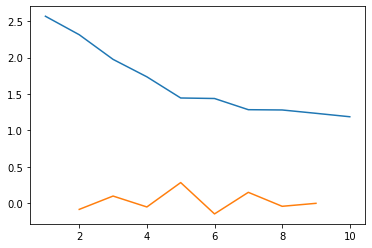

Рекомендованное количество кластеров: 5


In [ ]:
# Метод локтя. Позволячет оценить оптимальное количество сегментов.
# Показывает сумму внутри групповых вариаций
last = data_linkage1[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2 
print("Рекомендованное количество кластеров:", k)

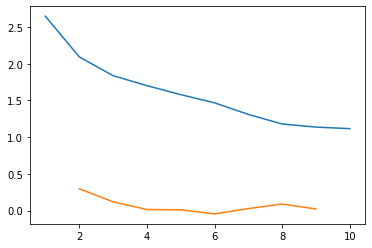

Рекомендованное количество кластеров: 2


In [ ]:
last = data_linkage2[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2 
print("Рекомендованное количество кластеров:", k)

In [ ]:
#функция построения дендрограмм
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample id')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [ ]:
# !!!!!!!!! укажите, какое количество кластеров будете использовать!
nClust1=34

In [ ]:
nClust2=34

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 13 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   połoczenia inhibitor betalaktamazy/ penicylina  35 non-null     int64  
 1   cefalosporyny 3 generacji                       35 non-null     int64  
 2   karbapenemy                                     35 non-null     int64  
 3   aminoglikozydy                                  35 non-null     int64  
 4   fluorochinolony                                 35 non-null     int64  
 5   sulfonamidy                                     35 non-null     int64  
 6   tetracykliny                                    35 non-null     int64  
 7   biofilm RT                                      35 non-null     float64
 8   biofilm 37C                                     35 non-null     float64
 9   swimming RT                                  

In [ ]:
df.describe()

,połoczenia inhibitor betalaktamazy/ penicylina,cefalosporyny 3 generacji,karbapenemy,aminoglikozydy,fluorochinolony,sulfonamidy,tetracykliny,biofilm RT,biofilm 37C,swimming RT,swimming 37C,swarming RT,swarming 37C
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,0.171429,0.542857,0.142857,0.114286,0.285714,0.257143,0.028571,0.289884,0.116926,23.651621,17.633611,8.273469,7.895918
std,0.382385,0.505433,0.355036,0.322803,0.458349,0.443440,0.169031,0.251791,0.268525,9.832151,13.343913,4.555299,3.198911
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.800000,2.625000,6.428571,6.285714
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.077806,0.012694,19.000000,6.151786,6.928571,6.857143
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.278926,0.033204,25.500000,12.900000,7.142857,7.142857
75%,0.000000,1.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.423944,0.079287,31.300000,29.250000,7.785714,7.714286
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.871444,1.458426,38.600000,40.000000,33.857143,25.666667


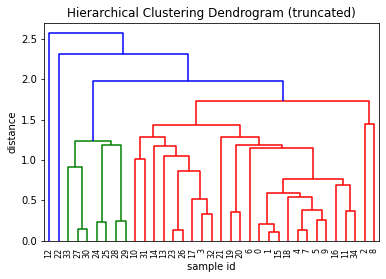

In [ ]:
fancy_dendrogram(
    data_linkage1,
    truncate_mode='level',
    p=nClust1, 
    leaf_rotation=90.,
    leaf_font_size=8.,
    show_contracted=True,
    annotate_above=100,
)
plt.savefig("wykres1.png",dpi = 300)
plt.show()

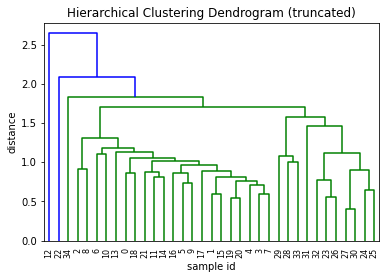

In [ ]:
#строим дендрограмму 
fancy_dendrogram(
    data_linkage2,
    truncate_mode='level',
    p=nClust2, 
    leaf_rotation=90.,
    leaf_font_size=8.,
    show_contracted=True,
    annotate_above=100,
)
plt.savefig("wykres2.png",dpi = 300)
plt.show()

In [ ]:
# иерархическая кластеризация
clusters=fcluster(data_linkage1, nClust1, criterion='maxclust')
clusters

array([20, 19, 30, 12, 21, 22, 28, 21, 31, 23,  8, 25, 33, 15, 16, 19, 27,
       14, 24, 17, 18, 29, 32, 10,  4,  5, 11,  1,  6,  7,  2,  9, 13,  3,
       26], dtype=int32)

In [ ]:
clusters=fcluster(data_linkage2, nClust2, criterion='maxclust')
clusters

array([ 5, 13,  1, 16, 18, 10,  3, 17,  2, 11,  4,  7, 33, 20,  8, 14, 12,
       19,  6, 15, 15,  9, 32, 24, 28, 29, 25, 27, 21, 23, 27, 30, 26, 22,
       31], dtype=int32)

In [ ]:
df[df['I']==33] # !!!!! меняйте номер кластера

KeyError: ignored

In [ ]:
# строим кластеризаци методом KMeans
km = KMeans(n_clusters=nClust1).fit(dataNorm1)

In [ ]:
# выведем полученное распределение по кластерам
# так же номер кластера, к котрому относится строка, так как нумерация начинается с нуля, выводим добавляя 1
km.labels_ +1

array([ 3, 28,  4, 27, 34, 14, 18, 26, 10, 29, 11, 24,  6, 19, 15, 28, 23,
        9, 22, 25, 12, 17,  8, 33, 31, 13,  5,  2, 30,  7, 32, 16, 21, 20,
        1], dtype=int32)

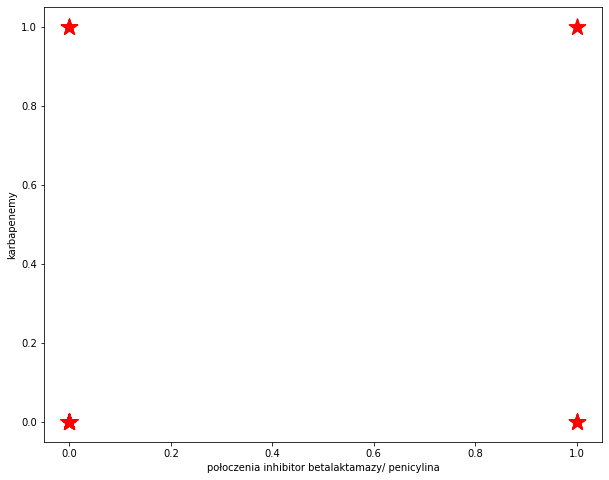

In [ ]:
x=0 # Чтобы построить диаграмму в разных осях, меняйте номера столбцов
y=2 #
centroids = km.cluster_centers_
plt.figure(figsize=(10, 8))
plt.scatter(dataNorm1[:,x], dataNorm1[:,y], c=km.labels_, cmap='flag')
plt.scatter(centroids[:, x], centroids[:, y], marker='*', s=300,
            c='r', label='centroid')
plt.xlabel(col1[x])
plt.ylabel(col1[y]);
plt.show()

In [ ]:
#сохраним результаты в файл
df.to_excel('result_claster.xlsx', index=False)

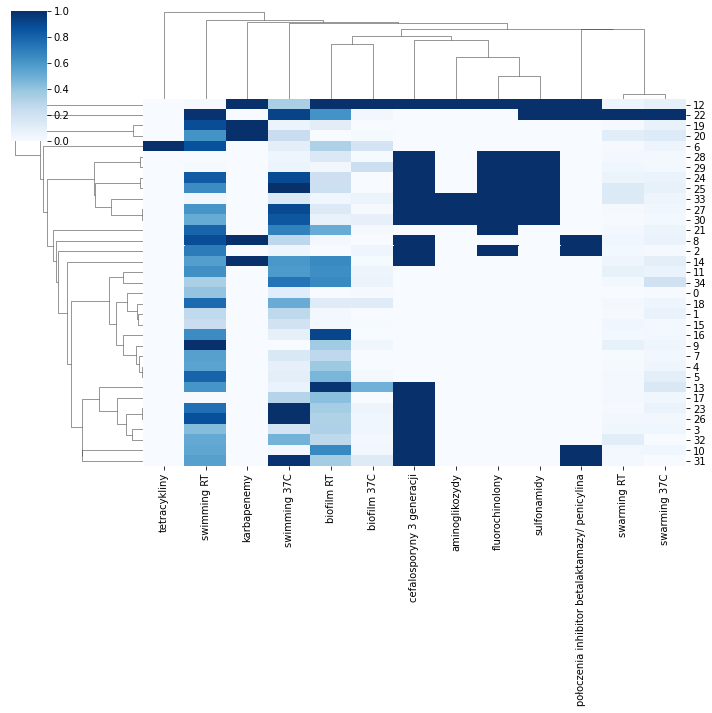

In [ ]:
sns.clustermap(df, metric="correlation", method="single", cmap="Blues", standard_scale=1)
plt.show()

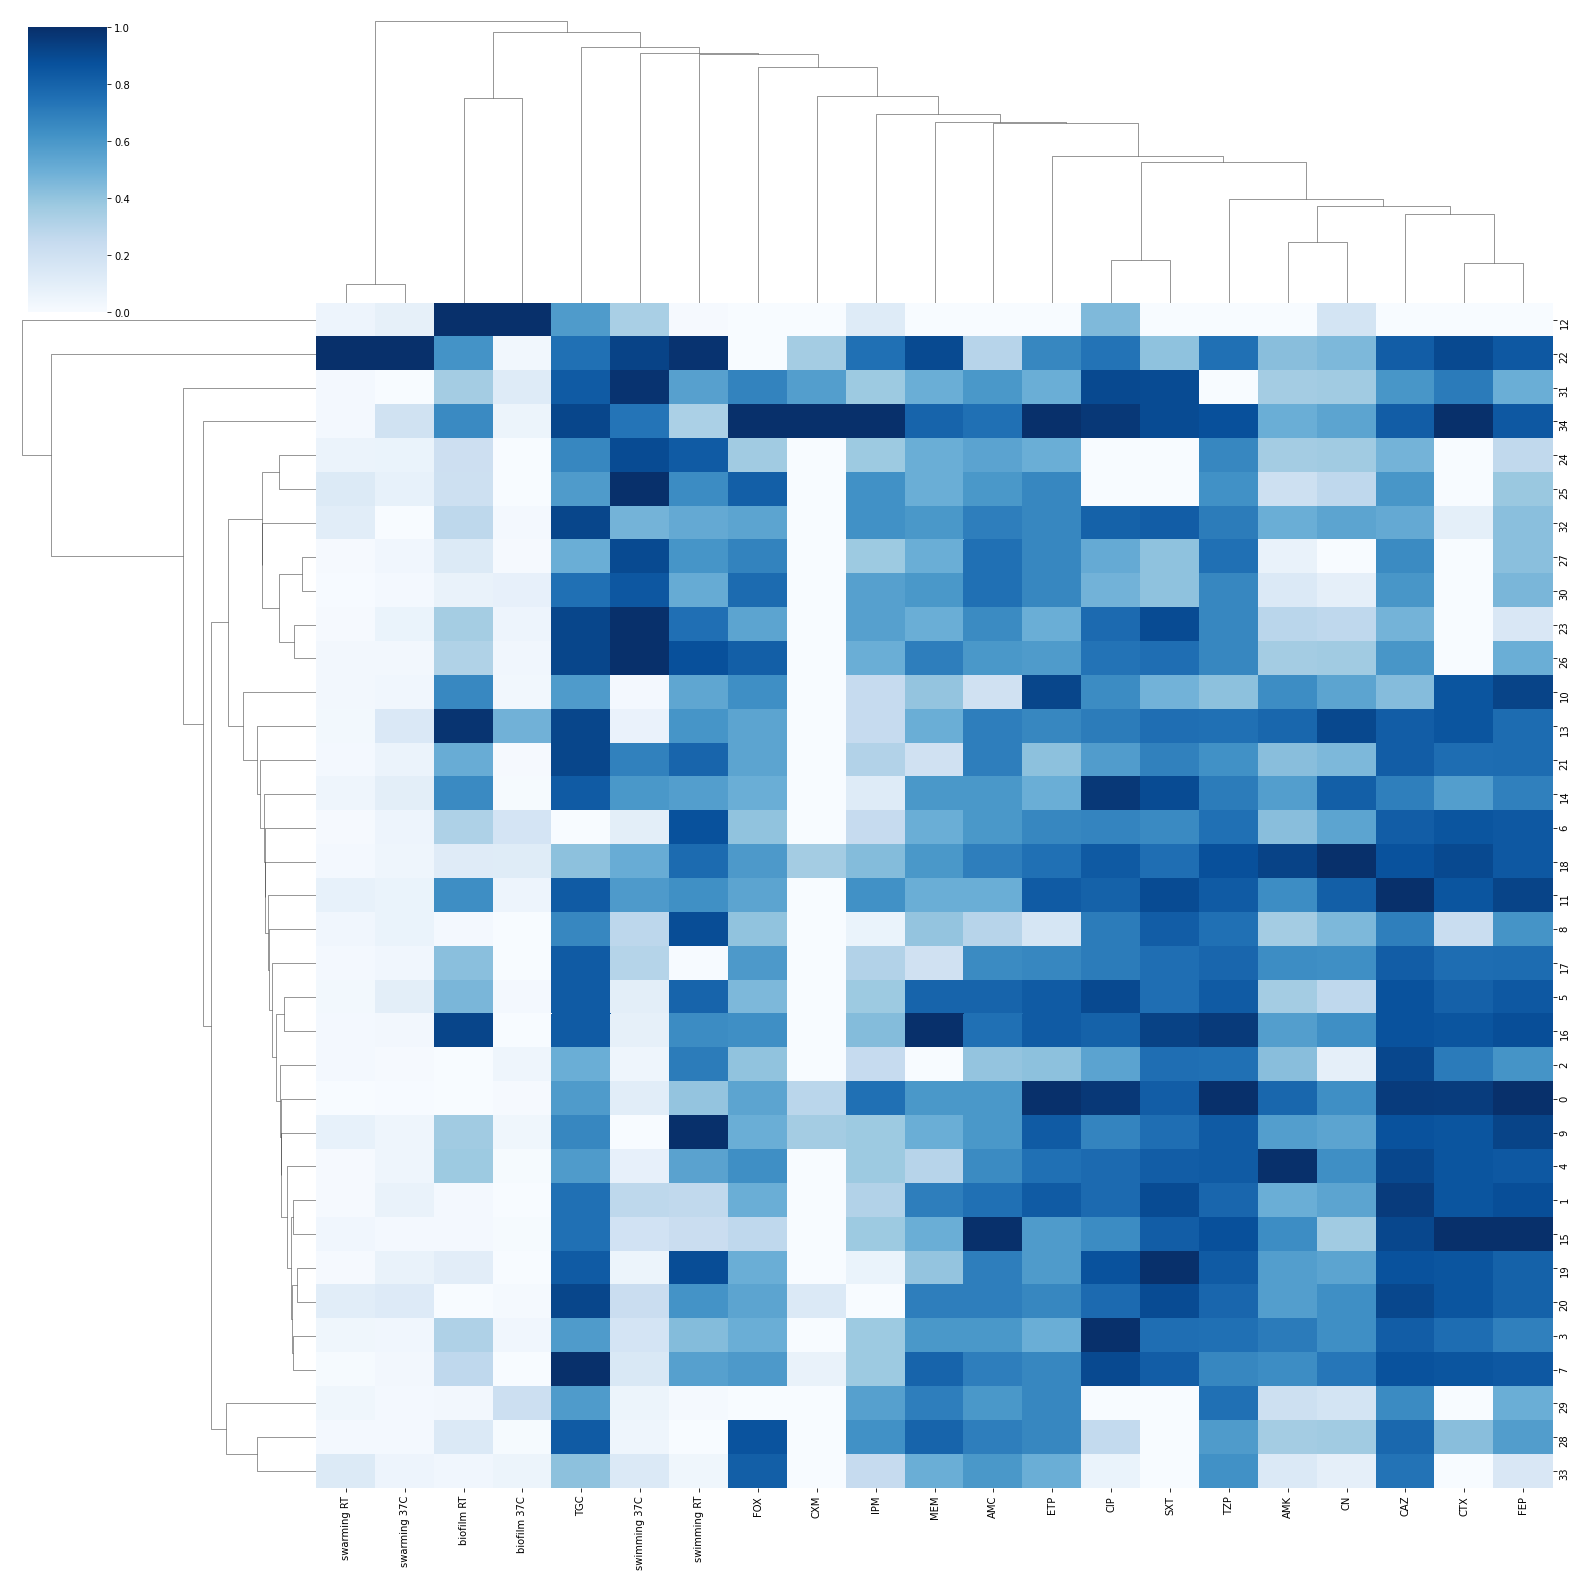

In [ ]:
sns.clustermap(df1, metric="correlation", figsize=(22, 22), method="single", cmap="Blues", standard_scale=1)
plt.savefig("clustmap2.png", dpi = 300)
plt.show()